In [94]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df = pd.read_csv('/content/Airline_Passangers.csv')

In [97]:
df.head(3)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [99]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller

In [100]:
from sklearn.metrics import mean_squared_error

In [101]:
dw_stats = durbin_watson(df.Passengers)
dw_stats

0.0121527966037621

Inference from dw stats = Positively autocorrelated data

In [102]:
dickey_fuller = adfuller(x = df.Passengers)
dickey_fuller

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

Inference from dickey_fuller stats:
p-val > 0.05, Hence we fail to reject null hypothesis. So, data is non stationary

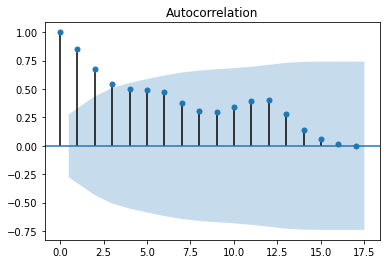

In [103]:
acf = plot_acf(df.Passengers[0:50])

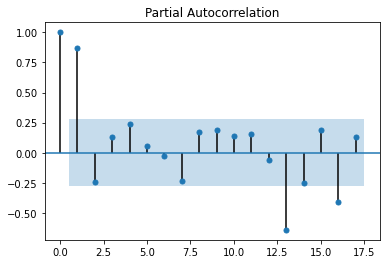

In [104]:
pacf = plot_pacf(df.Passengers[0:50])

Inference:


*   ACF plot gradually reduces to 0 after several 'q' lags (data shows signs of non-stationarity) => the same was confirmed by Dickey Fuller Test
*   PACF plot immediately reduces to 0 after p = 1 lag



**Building AR(p) model:**


*   order = (1,0,0)



In [105]:
order = (1,0,0)

In [106]:
model = ARIMA(df.Passengers[0:50], order = order)

In [107]:
AR_model = model.fit()

In [108]:
AR_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:               ARMA             BIC:                 427.9663
Dependent Variable:  Passengers       Log-Likelihood:      -208.12 
Date:                2022-08-29 11:12 Scale:               1.0000  
No. Observations:    50               Method:              css-mle 
Df Model:            2                Sample:              0       
Df Residuals:        48                                    0       
Converged:           1.0000           S.D. of innovations: 15.289  
No. Iterations:      15.0000          HQIC:                424.415 
AIC:                 422.2303                                      
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
const            158.3756  17.9118  8.8420 0.0000 123.2692 193.4821
ar.L1.Passengers   0.8958   0.0618 14.4952 0.0000   0.7747   1.0169
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.1164             0.0000           1.1164             0.0000
===================================================================

"""

Since, p-val < 0 => Hence, p = 1 lag (1st lag in PACF plot) is a significant variable in determining the autoregression of Passengers

In [109]:
AR_model.pvalues

const               9.403805e-19
ar.L1.Passengers    1.300136e-47
dtype: float64

In [110]:
AR_forecast = np.round(AR_model.predict(50,60),0)

In [111]:
AR_actual = df.Passengers[50:60]

In [112]:
df_forecast = pd.DataFrame({'AR_actual':AR_actual,'AR_forecast':AR_forecast})

In [113]:
df_forecast

,AR_actual,AR_forecast
50,236.0,192.0
51,235.0,189.0
52,229.0,185.0
53,243.0,183.0
54,264.0,180.0
55,272.0,178.0
56,237.0,176.0
57,211.0,174.0
58,180.0,172.0
59,201.0,171.0


In [114]:
def get_mape(actual, pred):
  mape = np.round(np.mean(np.abs(100*(actual-pred)/actual)),2)
  return mape

In [115]:
AR_mape = get_mape(df_forecast.AR_actual[:9], df_forecast.AR_forecast[:9])
AR_mape

21.8

In [116]:
AR_rmse = np.round(np.sqrt(mean_squared_error(df_forecast.AR_actual[:9], df_forecast.AR_forecast[:9])),2)
AR_rmse

58.34

Plotting ACF and PACF plots for AR model residuals:

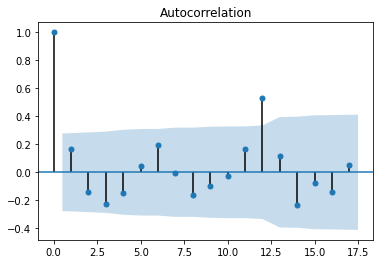

In [117]:
acf_resid = plot_acf(AR_model.resid)

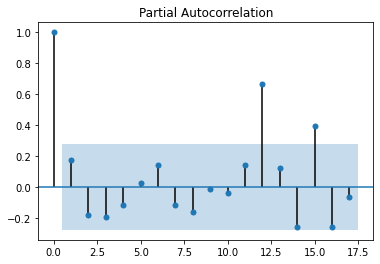

In [118]:
pacf_resid = plot_pacf(AR_model.resid)

Both ACF and PACF plots of AR model residuals immediately reduce to 0. This shows that AR model residuals are white noise and are not autocorrelated. 